# Project: Medical Appointment Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. See columns below
><ul>
    <li>PatientID</li>
    <li>AppointmentID</li>
    <li>Gender</li>
    <li>ScheduledDay - day the patient set up their appointment.</li>
    <li>AppointmentDay - day the patient had the appointment.</li>
    <li>Age</li>
    <li>Neighborhood - indicates the location of the hospital.</li>
    <li>Scholarship - indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
    <li>Hipertension</li>
    <li>Diabetes</li>
    <li>Alcoholism</li>
    <li>Handcap</li>
    <li>SMS_received - '0' if they did not receive and '1' if they did.</li>
    <li>No-show: 'No' if the patient showed up to their appointment, and 'Yes' if they did not show up.</li>
</ul>
    
    
    
    


### Question(s) for Analysis
>This Project will explore and provide insights to the following qustions:
1. What is the percentage of patients who attended their appointments against those who missed?
2. Does the age of a patient affect their attendance to appointments?
3. Does increase in number of waiting days affect patients attendance to appointments?
4. Does receiving SMS reminder affect patients attendance to appointments?

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

**In this section, we will load in the data, check for cleanliness, and then trim and clean the dataset for analysis.**

In [2]:
# Load data
df = pd.read_csv('../input/noshowappointments/KaggleV2-May-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


**Accessing and building intuition**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
df.shape

(110527, 14)

>There are `110527` rows and `14` columns in the dataset.

In [5]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


> From the above summary, we can deduce the fellowing;
><ul>
    <li>The average age of the patient is 37 years old.</li>
    <li>The youngest patient is -1 years old (which seems to be incorrect).</li>
    <li>The oldest patient is 115 years old.</li>
    <li>Less than half of the SMS sent were received.</li>
</ul>

In [6]:
sum(df.isnull().sum())

0

>In the above cell, it is clear that there are no missing values in the dataset.

In [7]:
df.duplicated().sum()

0

>There are no duplicated values found in the dataset.


### Data Cleaning


>**Renaming column headings**

In [8]:
df.rename(columns=lambda x: x.strip().lower().replace("-", "_"), inplace=True) # Convert to lowercase and "-" to "_"

In [9]:
df.rename(columns={'hipertension':'hypertension'},inplace=True) # Correct spelling mistake
df.rename(columns={'handcap':'handicap'},inplace=True) # Correct spelling mistake

In [10]:
df.rename(columns=lambda x: x.strip().lower().replace("id", "_id"), inplace=True) # Place "_" between patient/appointment id columns
df.rename(columns=lambda x: x.strip().lower().replace("day", "_day"), inplace=True) # Place "_" between patient/appointment day

>In the above cells, we renamed some columns in the dataframe to make it more articulate. See code below for change in columns.

In [11]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


>**Changing datatypes in columns**

In [12]:
df[['patient_id','appointment_id']].dtypes

patient_id        float64
appointment_id      int64
dtype: object

>Datatypes of the above columns need to be in `string/object` format. See code cells below for change.

In [13]:
ids=['patient_id','appointment_id']

for to_str in ids:
    df[to_str] = df[to_str].astype('str')

>In the above cell, we looped through both columns and change their formats to `string/object`. See code cell below to confirm this change.

In [14]:
df[['patient_id','appointment_id']].dtypes

patient_id        object
appointment_id    object
dtype: object

In [15]:
df[['scheduled_day','appointment_day']].dtypes

scheduled_day      object
appointment_day    object
dtype: object

>Datatypes of the above columns are in the wrong format. They need to be in `datetime()` format. See code cells below for change.

In [16]:
dates=['scheduled_day','appointment_day']

for date in dates:
    df[date] = pd.to_datetime(df[date])

>In the above cell, we looped through the two columns and changed the date format to `datetime()`. See code cell below to confirm this change.

In [17]:
df[['scheduled_day','appointment_day']].dtypes

scheduled_day      datetime64[ns, UTC]
appointment_day    datetime64[ns, UTC]
dtype: object

>**Adding columns**

In [18]:
waiting_days = df['appointment_day'].dt.date - df['scheduled_day'].dt.date
waiting_days = waiting_days.dt.days

df.insert(5, 'waiting_days', waiting_days)

>In the above cell, we add a new column `waiting_days`. See code cell below to confirm.

In [19]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_days,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [20]:
range_labels = ['0-4', '5-9', '10-17', '18-32', '33-52', '53-75', '76+']
max_age = df.age.max()
bins = [0, 4, 9, 17, 32, 52, 75, max_age]

age_range = pd.cut(df['age'],labels=range_labels, bins=bins)
df.insert(7, 'age_range', age_range)

>In the above cell, we add a new column `age_range` to show the range of ages of patients. See code cell below to confirm.

In [21]:
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,waiting_days,age,age_range,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296.0,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,53-75,JARDIM DA PENHA,0,1,0,0,0,0,No


>**Dropping columns / rows**

In [22]:
df.drop(['appointment_id'], axis=1, inplace=True)

>In the above cell we drop the `appointment_id` column since it has no effect on the analysis. See code cell below to confirm.

In [23]:
df.head(1)

,patient_id,gender,scheduled_day,appointment_day,waiting_days,age,age_range,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,29872499824296.0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,0,62,53-75,JARDIM DA PENHA,0,1,0,0,0,0,No


In [24]:
df.query('age == -1')

,patient_id,gender,scheduled_day,appointment_day,waiting_days,age,age_range,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,465943158731293.0,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,0,-1,NaN,ROMÃO,0,0,0,0,0,0,No


>The age in the above query is `-1` which renders that row invalid and hence needs to be dropped. See code cell below for rectification.

In [25]:
df.drop(df.query('age == -1').index, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

**In this section, we will explore and investigate the stated question(s) from multiple angles.**

## Research Questions:

### 1. What is the percentage of patients who attended their appointments against those who missed?

>Before we answer the above question we first need to know the number of patients who attended and that of those who missed. The code cell below provides this.

In [26]:
df.no_show.value_counts()

No     88207
Yes    22319
Name: no_show, dtype: int64

>It is clear from the cell above that the number of patients who attended their appointment is more than that of those who did not. **NB:** `No` means patient attended appointment. `Yes` means patient missed appointment.

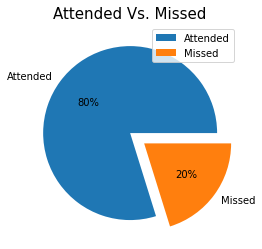

In [27]:
pie_df = df.no_show.value_counts()
plt.title('Attended Vs. Missed', fontsize=15)
plt.pie(pie_df, labels=['Attended', 'Missed'], autopct='%1.0f%%', explode=[0,0.2]); # autopct - displays the percentage value
plt.legend();

>From the above cell, **80% of patients attended their appointments while 20% of them missed.**

### 2. Does the age of a patient affect their attendance to appointments?

>We first need to consider the age distribution of patients. See code cell below.

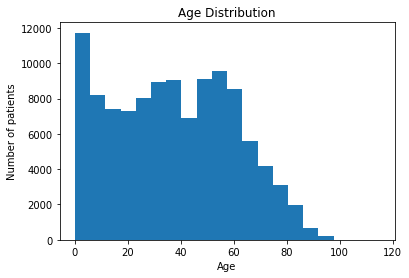

In [28]:
fig, ax = plt.subplots()
ax.hist(df['age'], linewidth=0.5, bins=20)
ax.set_xlabel("Age")
ax.set_title('Age Distribution');
ax.set_ylabel('Number of patients');

>In the above histogram, we can see that the most number of patients are children. We would now group the `age_range` against `no_show` column to see the correlation between a patient's age and their ability to attend an appointment. See code cells below.

In [29]:
a = df.groupby(['age_range'])['no_show'].count() # Total count of selected columns values.
b = df.groupby(['age_range', 'no_show'])['no_show'].count() # Total count of selected columns values against patients who attended and those who missed.
c = b/a # Divide b by a to get the count of patients who attended and those who missed

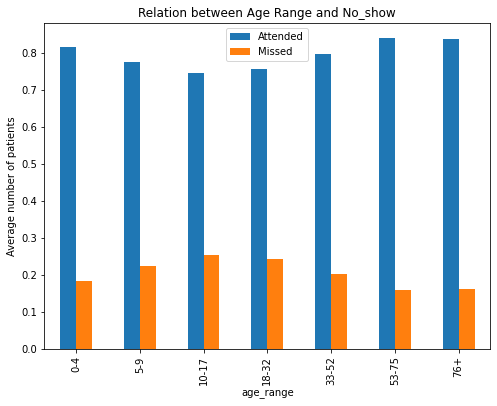

In [30]:
c.unstack().plot(kind = 'bar', figsize = (8,6));
plt.title('Relation between Age Range and No_show')
plt.ylabel('Average number of patients')
plt.legend(['Attended','Missed']);

>There is no distinct correlation between a patient's age and their ability to attend an appointment. This is because only few patients in the age ranges missed their appoitments. Therefore, the **age of a patient does not affect their attendance to appointments.**

### 3. Does increase in number of waiting days affect patients attendance to appointments?

In [31]:
wait_df = df.query('waiting_days <= 12') # get patients who have waiting days of not more than 12 days,
new_a = wait_df.groupby(['waiting_days'])['no_show'].count() # Total count of selected columns values.
new_b = wait_df.groupby(['waiting_days', 'no_show'])['no_show'].count() # Total count of selected columns values against patients who attended and those who missed.
new_c = new_b/new_a # Divide b by a to get the count of patients who attended and those who missed

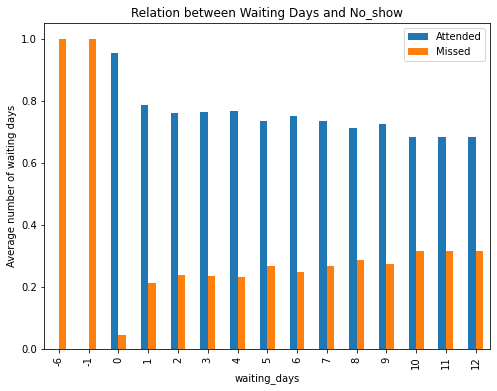

In [32]:
new_c.unstack().plot(kind = 'bar', figsize = (8,6));
plt.title('Relation between Waiting Days and No_show')
plt.ylabel('Average number of waiting days')
plt.legend(['Attended','Missed']);

>There is a direct relationship between waiting days and patients attendance. Patients who had their appointment on the scheduled date attended. However, **increase in the number of waiting days affects attendance** - the more patients have to wait for their appointment, the less they show up when the date is due.

### 4. Does receiving SMS reminder affect patients attendance to appointments?

>We would first group the `sms_received` and `no_show` columns and get their percentages values. See code cell below.

In [33]:
df.groupby('sms_received').no_show.value_counts(normalize=True)

sms_received  no_show
0             No         0.832965
              Yes        0.167035
1             No         0.724255
              Yes        0.275745
Name: no_show, dtype: float64

>In the code cell above, we can see that about `83%` of those who did not receive an sms reminder attended their appointments. About `72%` of those who received an sms reminder also attended their appointments.

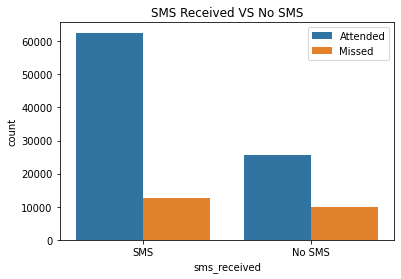

In [34]:
sns.countplot(x=df['sms_received'], hue=df['no_show']);
plt.title('SMS Received VS No SMS');
plt.xticks([0, 1], ['SMS', 'No SMS'], rotation=0);
plt.legend(['Attended','Missed']);

>We can deduce from the above chart that receiving **sms reminders has little to no effect of patients attendance.**

<a id='conclusions'></a>
## Conclusions

> 1. 80% of patients attended their appointments while 20% of them missed.
2. The age of a patient does not affect their attendance to appointments.
3. Increase in the number of waiting days affects attendance negatively.
4. SMS reminders has little to no effect on patients attendance.

## Limitations

> 1. The dataset has some rows with appointment days coming before their scheduled days, hence negative x values seen in bar chart of question 3.
